In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÌïòÍµ¨"
region_code = "12"
target_date = "2019-01-03"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÌïòÍµ¨2019_1q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-01-03   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425    ÏÇ¨ÌïòÍµ¨   9675    ÏÇ¨ÌïòÍµ¨   
1   2019-01-03     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6390    ÏÇ¨ÌïòÍµ¨   6677    ÏÇ¨ÌïòÍµ¨   
2   2019-01-03    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   2777    ÏÇ¨ÌïòÍµ¨   3666    ÏÇ¨ÌïòÍµ¨   
3   2019-01-03     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2880    ÏÇ¨ÌïòÍµ¨   2990    ÏÇ¨ÌïòÍµ¨   
4   2019-01-03    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5990    ÏÇ¨ÌïòÍµ¨   6272    ÏÇ¨ÌïòÍµ¨   
5   2019-01-03     ÎåÄÌåå                      1.0„éè   4685    ÏÇ¨ÌïòÍµ¨   4983    ÏÇ¨ÌïòÍµ¨   
6   2019-01-03   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   6750    ÏÇ¨ÌïòÍµ¨   8950    ÏÇ¨ÌïòÍµ¨   
7   2019-01-03     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365    ÏÇ¨ÌïòÍµ¨   4410    ÏÇ¨ÌïòÍµ¨   
8   2019-01-03     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÏÇ¨ÌïòÍµ¨    678    ÏÇ¨ÌïòÍµ¨   
9   2019-01-03     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1420    ÏÇ¨ÌïòÍµ¨   1460    ÏÇ¨ÌïòÍµ¨   
10  2019-01-03      Î¨¥                   2.0„éè 1Í∞ú   1180    ÏÇ¨ÌïòÍµ¨   1590    ÏÇ¨ÌïòÍµ¨   
11  2019-01-03    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3500    ÏÇ¨ÌïòÍµ¨   3790    ÏÇ¨ÌïòÍµ¨   
12  2019-01-03     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2966    ÏÇ¨ÌïòÍµ¨   3400    ÏÇ¨ÌïòÍµ¨   
13  2019-01-03      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  25800    ÏÇ¨ÌïòÍµ¨  26700    ÏÇ¨ÌïòÍµ¨   
14  2019-01-03     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2480    ÏÇ¨ÌïòÍµ¨   2990    ÏÇ¨ÌïòÍµ¨   
15  2019-01-03  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3495    ÏÇ¨ÌïòÍµ¨   3990    ÏÇ¨ÌïòÍµ¨   
16  2019-01-03   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13780    ÏÇ¨ÌïòÍµ¨  14290    ÏÇ¨ÌïòÍµ¨   
17  2019-01-03     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  11800    ÏÇ¨ÌïòÍµ¨  13980    ÏÇ¨ÌïòÍµ¨   
18  2019-01-03    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1658    ÏÇ¨ÌïòÍµ¨   2316    ÏÇ¨ÌïòÍµ¨   
19  2019-01-03     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÏÇ¨ÌïòÍµ¨   1990    ÏÇ¨ÌïòÍµ¨   
20  2019-01-03     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÌïòÍµ¨   1190    ÏÇ¨ÌïòÍµ¨   
21  2019-01-03    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  39950    ÏÇ¨ÌïòÍµ¨  42000    ÏÇ¨ÌïòÍµ¨   
22  2019-01-03    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950    ÏÇ¨ÌïòÍµ¨   7689    ÏÇ¨ÌïòÍµ¨   
23  2019-01-03      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  54000    ÏÇ¨ÌïòÍµ¨  59900    ÏÇ¨ÌïòÍµ¨   
24  2019-01-03     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1500    ÏÇ¨ÌïòÍµ¨   1993    ÏÇ¨ÌïòÍµ¨   
25  2019-01-03     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796    ÏÇ¨ÌïòÍµ¨    796    ÏÇ¨ÌïòÍµ¨   
26  2019-01-03    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250    ÏÇ¨ÌïòÍµ¨   7250    ÏÇ¨ÌïòÍµ¨   
27  2019-01-03   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500    ÏÇ¨ÌïòÍµ¨   2600    ÏÇ¨ÌïòÍµ¨   
28  2019-01-03     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2690    ÏÇ¨ÌïòÍµ¨   3130    ÏÇ¨ÌïòÍµ¨   
29  2019-01-03    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12040    ÏÇ¨ÌïòÍµ¨  15900    ÏÇ¨ÌïòÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   2250   30.3%   8,550  
1    287   4.49%   6,534  
2    889  32.01%   3,222  
3    110   3.82%   2,935  
4    282   4.71%   6,131  
5    298   6.36%   4,834  
6   2200  32.59%   7,850  
7     45   1.03%   4,388  
8      2    0.3%     677  
9     40   2.82%   1,440  
10   410  34.75%   1,385  
11   290   8.29%   3,645  
12   434  14.63%   3,183  
13   900   3.49%  26,250  
14   510  20.56%   2,735  
15   495  14.16%   3,743  
16   510    3.7%  14,035  
17  2180  18.47%  12,890  
18   658  39.69%   1,987  
19   410  25.95%   1,785  
20     0    0.0%   1,190  
21  2050   5.13%  40,975  
22   739  

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÌïòÍµ¨"
region_code = "12"
target_date = "2019-04-04"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÌïòÍµ¨2019_2q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-04-04   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425    ÏÇ¨ÌïòÍµ¨   7959    ÏÇ¨ÌïòÍµ¨   
1   2019-04-04     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6677    ÏÇ¨ÌïòÍµ¨   6990    ÏÇ¨ÌïòÍµ¨   
2   2019-04-04    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3555    ÏÇ¨ÌïòÍµ¨   5544    ÏÇ¨ÌïòÍµ¨   
3   2019-04-04     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2880    ÏÇ¨ÌïòÍµ¨   2990    ÏÇ¨ÌïòÍµ¨   
4   2019-04-04    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6818    ÏÇ¨ÌïòÍµ¨   6990    ÏÇ¨ÌïòÍµ¨   
5   2019-04-04     ÎåÄÌåå                      1.0„éè   2828    ÏÇ¨ÌïòÍµ¨   3333    ÏÇ¨ÌïòÍµ¨   
6   2019-04-04   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   7450    ÏÇ¨ÌïòÍµ¨   8950    ÏÇ¨ÌïòÍµ¨   
7   2019-04-04     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4531    ÏÇ¨ÌïòÍµ¨   4531    ÏÇ¨ÌïòÍµ¨   
8   2019-04-04     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÏÇ¨ÌïòÍµ¨    678    ÏÇ¨ÌïòÍµ¨   
9   2019-04-04     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1420    ÏÇ¨ÌïòÍµ¨   1460    ÏÇ¨ÌïòÍµ¨   
10  2019-04-04      Î¨¥                   2.0„éè 1Í∞ú   1000    ÏÇ¨ÌïòÍµ¨   1280    ÏÇ¨ÌïòÍµ¨   
11  2019-04-04    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3500    ÏÇ¨ÌïòÍµ¨   3790    ÏÇ¨ÌïòÍµ¨   
12  2019-04-04     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   5900    ÏÇ¨ÌïòÍµ¨   6600    ÏÇ¨ÌïòÍµ¨   
13  2019-04-04      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  19800    ÏÇ¨ÌïòÍµ¨  29727    ÏÇ¨ÌïòÍµ¨   
14  2019-04-04     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2280    ÏÇ¨ÌïòÍµ¨   3990    ÏÇ¨ÌïòÍµ¨   
15  2019-04-04  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3490    ÏÇ¨ÌïòÍµ¨   3495    ÏÇ¨ÌïòÍµ¨   
16  2019-04-04   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13780    ÏÇ¨ÌïòÍµ¨  14290    ÏÇ¨ÌïòÍµ¨   
17  2019-04-04     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  11980    ÏÇ¨ÌïòÍµ¨  15800    ÏÇ¨ÌïòÍµ¨   
18  2019-04-04    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1816    ÏÇ¨ÌïòÍµ¨   1824    ÏÇ¨ÌïòÍµ¨   
19  2019-04-04     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÏÇ¨ÌïòÍµ¨   1990    ÏÇ¨ÌïòÍµ¨   
20  2019-04-04     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÌïòÍµ¨   1190    ÏÇ¨ÌïòÍµ¨   
21  2019-04-04    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  43950    ÏÇ¨ÌïòÍµ¨  46000    ÏÇ¨ÌïòÍµ¨   
22  2019-04-04    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950    ÏÇ¨ÌïòÍµ¨   7690    ÏÇ¨ÌïòÍµ¨   
23  2019-04-04      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  54000    ÏÇ¨ÌïòÍµ¨  59900    ÏÇ¨ÌïòÍµ¨   
24  2019-04-04     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1786    ÏÇ¨ÌïòÍµ¨   1993    ÏÇ¨ÌïòÍµ¨   
25  2019-04-04     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796    ÏÇ¨ÌïòÍµ¨    796    ÏÇ¨ÌïòÍµ¨   
26  2019-04-04    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250    ÏÇ¨ÌïòÍµ¨   7290    ÏÇ¨ÌïòÍµ¨   
27  2019-04-04   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500    ÏÇ¨ÌïòÍµ¨   2600    ÏÇ¨ÌïòÍµ¨   
28  2019-04-04     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2690    ÏÇ¨ÌïòÍµ¨   3130    ÏÇ¨ÌïòÍµ¨   
29  2019-04-04    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  15900    ÏÇ¨ÌïòÍµ¨  16790    ÏÇ¨ÌïòÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    534   7.19%   7,692  
1    313   4.69%   6,834  
2   1989  55.95%   4,550  
3    110   3.82%   2,935  
4    172   2.52%   6,904  
5    505  17.86%   3,081  
6   1500  20.13%   8,200  
7      0    0.0%   4,531  
8      2    0.3%     677  
9     40   2.82%   1,440  
10   280   28.0%   1,140  
11   290   8.29%   3,645  
12   700  11.86%   6,250  
13  9927  50.14%  24,764  
14  1710   75.0%   3,135  
15     5   0.14%   3,493  
16   510    3.7%  14,035  
17  3820  31.89%  13,890  
18     8   0.44%   1,820  
19   410  25.95%   1,785  
20     0    0.0%   1,190  
21  2050   4.66%  44,975  
22   740  

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÌïòÍµ¨"
region_code = "12"
target_date = "2019-07-04"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÌïòÍµ¨2019_3q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-07-04   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425    ÏÇ¨ÌïòÍµ¨   7959    ÏÇ¨ÌïòÍµ¨   
1   2019-07-04     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6677    ÏÇ¨ÌïòÍµ¨   6990    ÏÇ¨ÌïòÍµ¨   
2   2019-07-04    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4605    ÏÇ¨ÌïòÍµ¨   5444    ÏÇ¨ÌïòÍµ¨   
3   2019-07-04     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2980    ÏÇ¨ÌïòÍµ¨   2990    ÏÇ¨ÌïòÍµ¨   
4   2019-07-04    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6272    ÏÇ¨ÌïòÍµ¨   6990    ÏÇ¨ÌïòÍµ¨   
5   2019-07-04     ÎåÄÌåå                      1.0„éè   3571    ÏÇ¨ÌïòÍµ¨   3666    ÏÇ¨ÌïòÍµ¨   
6   2019-07-04   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8950    ÏÇ¨ÌïòÍµ¨   9950    ÏÇ¨ÌïòÍµ¨   
7   2019-07-04     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4531    ÏÇ¨ÌïòÍµ¨   4531    ÏÇ¨ÌïòÍµ¨   
8   2019-07-04     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÏÇ¨ÌïòÍµ¨    678    ÏÇ¨ÌïòÍµ¨   
9   2019-07-04     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1420    ÏÇ¨ÌïòÍµ¨   1460    ÏÇ¨ÌïòÍµ¨   
10  2019-07-04      Î¨¥                   2.0„éè 1Í∞ú   1480    ÏÇ¨ÌïòÍµ¨   1990    ÏÇ¨ÌïòÍµ¨   
11  2019-07-04    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3500    ÏÇ¨ÌïòÍµ¨   3790    ÏÇ¨ÌïòÍµ¨   
12  2019-07-04     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú  10900    ÏÇ¨ÌïòÍµ¨  11125    ÏÇ¨ÌïòÍµ¨   
13  2019-07-04      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  24950    ÏÇ¨ÌïòÍµ¨  37909    ÏÇ¨ÌïòÍµ¨   
14  2019-07-04     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2880    ÏÇ¨ÌïòÍµ¨   3990    ÏÇ¨ÌïòÍµ¨   
15  2019-07-04  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3495    ÏÇ¨ÌïòÍµ¨   3990    ÏÇ¨ÌïòÍµ¨   
16  2019-07-04   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13780    ÏÇ¨ÌïòÍµ¨  14290    ÏÇ¨ÌïòÍµ¨   
17  2019-07-04     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  15180    ÏÇ¨ÌïòÍµ¨  17800    ÏÇ¨ÌïòÍµ¨   
18  2019-07-04    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316    ÏÇ¨ÌïòÍµ¨   2325    ÏÇ¨ÌïòÍµ¨   
19  2019-07-04     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÏÇ¨ÌïòÍµ¨   1990    ÏÇ¨ÌïòÍµ¨   
20  2019-07-04     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÌïòÍµ¨   1190    ÏÇ¨ÌïòÍµ¨   
21  2019-07-04    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  39950    ÏÇ¨ÌïòÍµ¨  46000    ÏÇ¨ÌïòÍµ¨   
22  2019-07-04    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5950    ÏÇ¨ÌïòÍµ¨   6950    ÏÇ¨ÌïòÍµ¨   
23  2019-07-04      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49800    ÏÇ¨ÌïòÍµ¨  59900    ÏÇ¨ÌïòÍµ¨   
24  2019-07-04     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1320    ÏÇ¨ÌïòÍµ¨   1333    ÏÇ¨ÌïòÍµ¨   
25  2019-07-04     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796    ÏÇ¨ÌïòÍµ¨    796    ÏÇ¨ÌïòÍµ¨   
26  2019-07-04    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250    ÏÇ¨ÌïòÍµ¨   7290    ÏÇ¨ÌïòÍµ¨   
27  2019-07-04   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500    ÏÇ¨ÌïòÍµ¨   2600    ÏÇ¨ÌïòÍµ¨   
28  2019-07-04     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2500    ÏÇ¨ÌïòÍµ¨   3130    ÏÇ¨ÌïòÍµ¨   
29  2019-07-04    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  11397    ÏÇ¨ÌïòÍµ¨  15900    ÏÇ¨ÌïòÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     534   7.19%   7,692  
1     313   4.69%   6,834  
2     839  18.22%   5,025  
3      10   0.34%   2,985  
4     718  11.45%   6,631  
5      95   2.66%   3,619  
6    1000  11.17%   9,450  
7       0    0.0%   4,531  
8       2    0.3%     677  
9      40   2.82%   1,440  
10    510  34.46%   1,735  
11    290   8.29%   3,645  
12    225   2.06%  11,013  
13  12959  51.94%  31,430  
14   1110  38.54%   3,435  
15    495  14.16%   3,743  
16    510    3.7%  14,035  
17   2620  17.26%  16,490  
18      9   0.39%   2,321  
19    410  25.95%   1,785  
20      0    0.0%   1,190  
21   6050  15.1

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÌïòÍµ¨"
region_code = "12"
target_date = "2019-10-10"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÌïòÍµ¨2019_4q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-10-10   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6300    ÏÇ¨ÌïòÍµ¨  13115    ÏÇ¨ÌïòÍµ¨   
1   2019-10-10     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6350    ÏÇ¨ÌïòÍµ¨   6677    ÏÇ¨ÌïòÍµ¨   
2   2019-10-10     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   9800    ÏÇ¨ÌïòÍµ¨  10900    ÏÇ¨ÌïòÍµ¨   
3   2019-10-10    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3300    ÏÇ¨ÌïòÍµ¨   4433    ÏÇ¨ÌïòÍµ¨   
4   2019-10-10     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2980    ÏÇ¨ÌïòÍµ¨   2990    ÏÇ¨ÌïòÍµ¨   
5   2019-10-10    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5990    ÏÇ¨ÌïòÍµ¨   6272    ÏÇ¨ÌïòÍµ¨   
6   2019-10-10     ÎåÄÌåå                      1.0„éè   3100    ÏÇ¨ÌïòÍµ¨   3985    ÏÇ¨ÌïòÍµ¨   
7   2019-10-10   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8400    ÏÇ¨ÌïòÍµ¨  10950    ÏÇ¨ÌïòÍµ¨   
8   2019-10-10     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4531    ÏÇ¨ÌïòÍµ¨   4586    ÏÇ¨ÌïòÍµ¨   
9   2019-10-10     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÏÇ¨ÌïòÍµ¨    678    ÏÇ¨ÌïòÍµ¨   
10  2019-10-10     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1420    ÏÇ¨ÌïòÍµ¨   1460    ÏÇ¨ÌïòÍµ¨   
11  2019-10-10      Î¨¥                   2.0„éè 1Í∞ú   1590    ÏÇ¨ÌïòÍµ¨   2680    ÏÇ¨ÌïòÍµ¨   
12  2019-10-10    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3500    ÏÇ¨ÌïòÍµ¨   3790    ÏÇ¨ÌïòÍµ¨   
13  2019-10-10     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   6800    ÏÇ¨ÌïòÍµ¨   7491    ÏÇ¨ÌïòÍµ¨   
14  2019-10-10      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  21800    ÏÇ¨ÌïòÍµ¨  26940    ÏÇ¨ÌïòÍµ¨   
15  2019-10-10     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   6480    ÏÇ¨ÌïòÍµ¨   6990    ÏÇ¨ÌïòÍµ¨   
16  2019-10-10  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3486    ÏÇ¨ÌïòÍµ¨   5990    ÏÇ¨ÌïòÍµ¨   
17  2019-10-10   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13780    ÏÇ¨ÌïòÍµ¨  14290    ÏÇ¨ÌïòÍµ¨   
18  2019-10-10     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú   9900    ÏÇ¨ÌïòÍµ¨  11960    ÏÇ¨ÌïòÍµ¨   
19  2019-10-10    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1816    ÏÇ¨ÌïòÍµ¨   2325    ÏÇ¨ÌïòÍµ¨   
20  2019-10-10     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÏÇ¨ÌïòÍµ¨   1690    ÏÇ¨ÌïòÍµ¨   
21  2019-10-10     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÌïòÍµ¨   1190    ÏÇ¨ÌïòÍµ¨   
22  2019-10-10    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950    ÏÇ¨ÌïòÍµ¨   7908    ÏÇ¨ÌïòÍµ¨   
23  2019-10-10      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  54000    ÏÇ¨ÌïòÍµ¨  59900    ÏÇ¨ÌïòÍµ¨   
24  2019-10-10     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1390    ÏÇ¨ÌïòÍµ¨   1726    ÏÇ¨ÌïòÍµ¨   
25  2019-10-10    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   7580    ÏÇ¨ÌïòÍµ¨   7990    ÏÇ¨ÌïòÍµ¨   
26  2019-10-10     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796    ÏÇ¨ÌïòÍµ¨    796    ÏÇ¨ÌïòÍµ¨   
27  2019-10-10    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250    ÏÇ¨ÌïòÍµ¨   7250    ÏÇ¨ÌïòÍµ¨   
28  2019-10-10   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500    ÏÇ¨ÌïòÍµ¨   2600    ÏÇ¨ÌïòÍµ¨   
29  2019-10-10     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2500    ÏÇ¨ÌïòÍµ¨   2590    ÏÇ¨ÌïòÍµ¨   
30  2019-10-10    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13471    ÏÇ¨ÌïòÍµ¨  16900    ÏÇ¨ÌïòÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   6815  108.17%   9,708  
1    327    5.15%   6,514  
2   1100   11.22%  10,350  
3   1133   34.33%   3,867  
4     10    0.34%   2,985  
5    282    4.71%   6,131  
6    885   28.55%   3,543  
7   2550   30.36%   9,675  
8     55    1.21%   4,559  
9      2     0.3%     677  
10    40    2.82%   1,440  
11  1090   68.55%   2,135  
12   290    8.29%   3,645  
13   691   10.16%   7,146  
14  5140   23.58%  24,370  
15   510    7.87%   6,735  
16  2504   71.83%   4,738  
17   510     3.7%  1

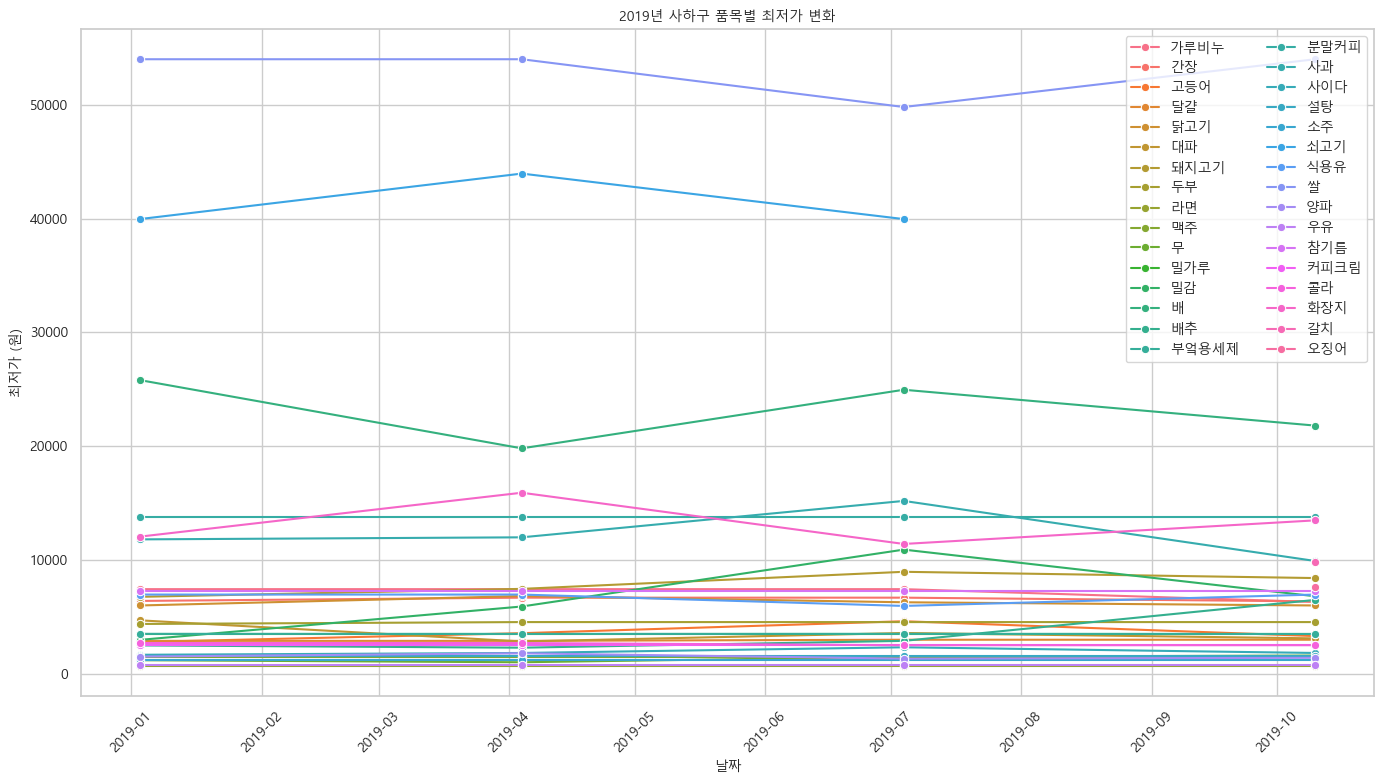

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2019_1q.csv")
q2 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2019_2q.csv")
q3 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2019_3q.csv")
q4 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2019_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2019ÎÖÑ ÏÇ¨ÌïòÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÏÇ¨ÌïòÍµ¨2019_min.csv", index=False, encoding="utf-8-sig")

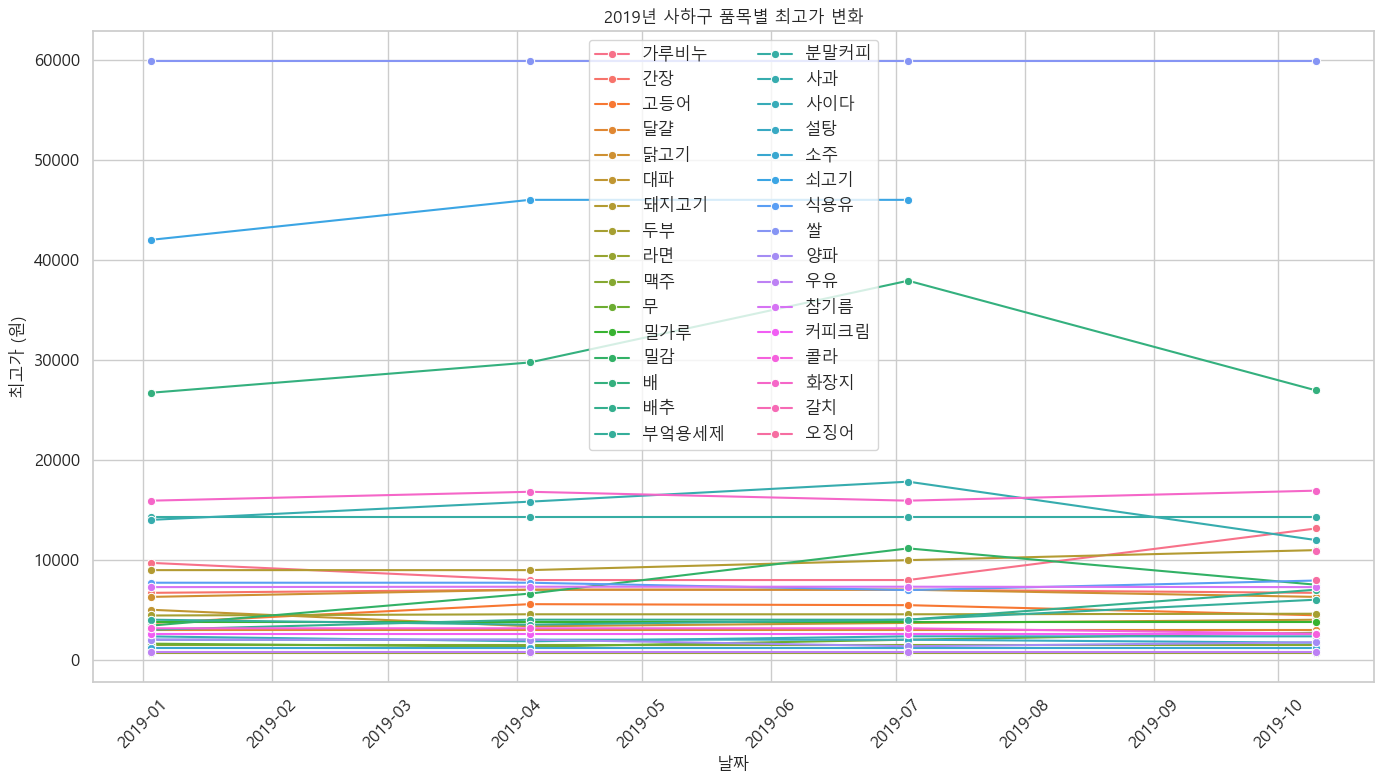

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2019_1q.csv")
q2 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2019_2q.csv")
q3 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2019_3q.csv")
q4 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2019_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2019ÎÖÑ ÏÇ¨ÌïòÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÏÇ¨ÌïòÍµ¨2019_max.csv", index=False, encoding="utf-8-sig")